<a href="https://colab.research.google.com/github/PatanArshiya/ProjectsArshiya/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

transaction_path = "/content/elliptic_transaction_1000.csv"
classes_path = "/content/elliptic_type_class.csv"
edgelist_path ="/content/elliptic_txs_edgelist.csv"

transaction = pd.read_csv(transaction_path, header=None) # Changed features_path to transaction_path
classes = pd.read_csv(classes_path)
edgelist = pd.read_csv(edgelist_path)

transaction.columns = ['txId'] + [f'V{i}' for i in range(1, 167)]


print("Dataset Shapes:")
print(f"  Features : {transaction.shape[0]} rows, {transaction.shape[1]} columns")
print(f"  Classes  : {classes.shape[0]} rows, {classes.shape[1]} columns")
print(f"  Edgelist : {edgelist.shape[0]} rows, {edgelist.shape[1]} columns")

Dataset Shapes:
  Features : 1001 rows, 167 columns
  Classes  : 203769 rows, 2 columns
  Edgelist : 234355 rows, 2 columns


In [ ]:
transaction.head(5)

,txId,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [ ]:
classes.head(5)

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [ ]:
classes['class_mapped'] = classes['class'].replace({'1': 'illicit', '2': 'licit'})

percentage_distribution = round(100 * classes['class_mapped'].value_counts(normalize=True), 2)
class_counts = classes['class_mapped'].value_counts()

emoji_mapping = {'licit': '✅', 'illicit': '❌', 'unknown': '🤷'}
classes['emoji'] = classes['class_mapped'].map(emoji_mapping)

classes_df = pd.DataFrame({
    'Class Mapped': classes['class_mapped'].unique(),
    'Class Raw': classes['class'].unique(),
    'Counts': class_counts.values,
    'Percentage': percentage_distribution.values,
    'Emoji': [emoji_mapping[class_label] for class_label in classes['class_mapped'].unique()]
})

print(classes_df)

  Class Mapped Class Raw  Counts  Percentage Emoji
0      unknown   unknown  157205       77.15     🤷
1        licit         2   42019       20.62     ✅
2      illicit         1    4545        2.23     ❌


In [ ]:
edgelist.head(5)

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


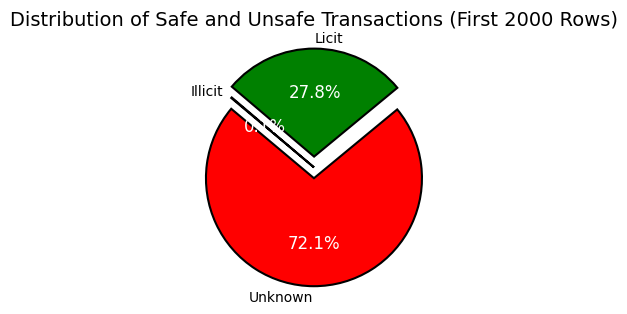

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

classes_path = "/content/elliptic_type_class.csv"
classes = pd.read_csv(classes_path, nrows=2000)

classes['class_mapped'] = classes['class'].replace({'1': 'Illicit', '2': 'Licit', 'unknown': 'Unknown'})

class_counts = classes['class_mapped'].value_counts()


fig, ax = plt.subplots(figsize=(3, 5))
wedges, texts, autotexts = ax.pie(
    class_counts.values,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['red', 'green', 'gray'],
    explode=(0.1, 0.1, 0),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

ax.set_title('Distribution of Safe and Unsafe Transactions (First 2000 Rows)', fontsize=14)

def on_hover(event):
    for wedge, label, percent in zip(wedges, texts, autotexts):
        if wedge.contains_point([event.x, event.y]):
            label.set_fontweight('bold')
            wedge.set_linewidth(2)
        else:
            label.set_fontweight('normal')
            wedge.set_linewidth(1.5)

fig.canvas.mpl_connect('motion_notify_event', on_hover)

plt.tight_layout()
plt.show()


In [ ]:
print("Unique values in 'class' column:", classes['class'].unique())


Unique values in 'class' column: ['unknown' '2' '1']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv("/content/elliptic_transaction_1000.csv", header=None)


df.columns = ['txId'] + [f'V{i}' for i in range(1, 167)]  # Manuaally assign column names


feature_cols = [f"V{i}" for i in range(1, 166)]
target_col = "V166"


X = df[feature_cols]
y = df[target_col]


if pd.api.types.is_numeric_dtype(y) and not pd.api.types.is_bool_dtype(y):

    y = (y > 0).astype(int)
    print("Target variable converted to binary classes.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Target variable converted to binary classes.
Confusion Matrix:
[[152   0]
 [  3  46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       152
           1       1.00      0.94      0.97        49

    accuracy                           0.99       201
   macro avg       0.99      0.97      0.98       201
weighted avg       0.99      0.99      0.98       201


Accuracy: 0.99


Target variable converted to binary classes.
Confusion Matrix:
[[152   0]
 [  0  49]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00        49

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201


Accuracy: 1.00


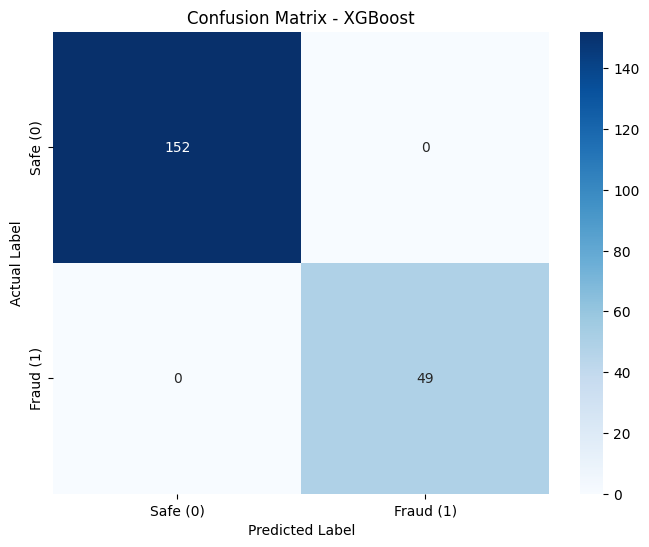

In [ ]:
!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/elliptic_transaction_1000.csv", header=None)

df.columns = ['txId'] + [f'V{i}' for i in range(1, 167)]

feature_cols = [f"V{i}" for i in range(1, 166)]
target_col = "V166"

X = df[feature_cols]
y = df[target_col]

if pd.api.types.is_numeric_dtype(y) and not pd.api.types.is_bool_dtype(y):

    y = (y > 0).astype(int)
    print("Target variable converted to binary classes.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Safe (0)", "Fraud (1)"],
            yticklabels=["Safe (0)", "Fraud (1)"])
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

SVM Accuracy: 0.9900497512437811
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       1.00      0.96      0.98        56

    accuracy                           0.99       201
   macro avg       0.99      0.98      0.99       201
weighted avg       0.99      0.99      0.99       201



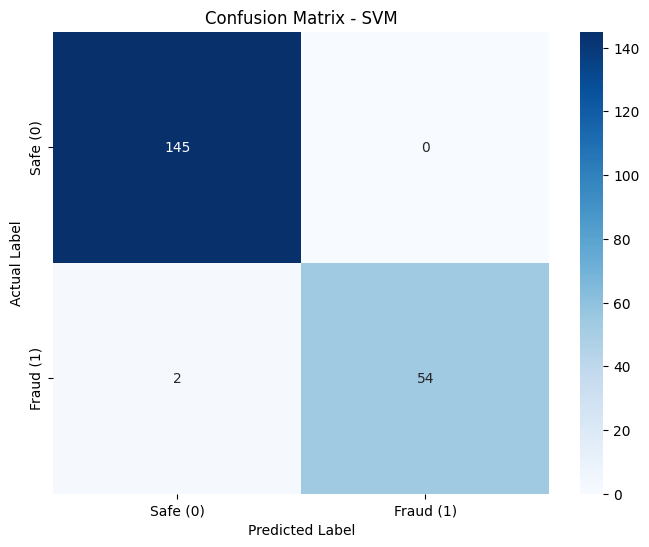

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

transaction = pd.read_csv("/content/elliptic_transaction_1000.csv", header=None)

transaction.columns = ['txId'] + [f'V{i}' for i in range(1, 167)]

feature_cols = [f"V{i}" for i in range(1, 166)]
target_col = "V166"

X = transaction[feature_cols]
y = transaction[target_col]

y = (y > 0).astype(int)

class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts < 2].index
X = X[~y.isin(classes_to_remove)]
y = y[~y.isin(classes_to_remove)]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(svm_report)
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Safe (0)", "Fraud (1)"],
            yticklabels=["Safe (0)", "Fraud (1)"])
plt.title("Confusion Matrix - SVM")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:

import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/elliptic_transaction_1000.csv", header=None)
df.columns = ['txId'] + [f'V{i}' for i in range(1, 167)]
feature_cols = [f"V{i}" for i in range(1, 166)]
target_col = "V166"
X = df[feature_cols]
y = (df[target_col] > 0).astype(int)

class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts < 2].index
X = X[~y.isin(classes_to_remove)]
y = y[~y.isin(classes_to_remove)]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost and SVM
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# --- User Interaction Menu ---
def predict_transaction():
    while True:
        print("\nChoose an option:")
        print("1. Enter row number from dataset")
        print("2. Manually enter features")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            try:
                idx = int(input("Enter row number (0 to {}): ".format(len(X) - 1)))
                tx_features = X.iloc[[idx]]
            except:
                print("Invalid row number.")
                continue
        elif choice == '2':
            tx_features = []
            print("Enter 165 feature values (press enter after each):")
            try:
                for i in range(1, 166):
                    val = float(input(f"V{i}: "))
                    tx_features.append(val)
                tx_features = pd.DataFrame([tx_features], columns=feature_cols)
            except:
                print("Invalid input. Please enter numeric values.")
                continue
        elif choice == '3':
            print("Transaction are checked")
            break
        else:
            print("Invalid choice.")
            continue

        # Predictions
        xgb_pred = xgb_model.predict(tx_features)[0]
        svm_pred = svm_model.predict(tx_features)[0]

        print("\n--- **Prediction Results** ---")
        print("->XGBoost Model: {}".format("Fraudulent" if xgb_pred == 1 else "Safe"))
        print("->SVM Model: {}".format("Fraudulent" if svm_pred == 1 else "Safe"))

predict_transaction()



Choose an option:
1. Enter row number from dataset
2. Manually enter features
3. Exit
Enter your choice: 3
Transaction are checked
